In [1]:
# using Coding to get an idea which models are usefull.

In [5]:
#!pip install xgboost -q
! pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1


In [16]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [10]:
df = sns.load_dataset('iris')
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [47]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [31]:
# plot data
sns.scatterplot(data = df, x = "sepal_width", y = "sepal_length", hue='species')

ValueError: Could not interpret value `sepal_width` for `x`. An entry with this name does not appear in `data`.

In [48]:
X = df.drop('cut', axis = 1)
y = df['cut']

In [51]:
# label encoder
le  = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])
y = le.fit_transform(y)
# split data into train & test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=20)


In [52]:
%%time
# train the Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# predict
y_pred = dt.predict(X_test)
# print matrix and accuracy score
print("Accuracy Score", accuracy_score(y_test, y_pred))
print("Precision Score", precision_score(y_test, y_pred, average="micro"))
print("F1_Score", f1_score(y_test, y_pred, average = "micro"))
print("Recall_Score", recall_score(y_test, y_pred, average = "micro"))

Accuracy Score 0.6
Precision Score 0.6
F1_Score 0.6
Recall_Score 0.6
CPU times: user 430 ms, sys: 1.9 ms, total: 432 ms
Wall time: 432 ms


In [53]:
%%time
# train the Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# predict
y_pred1 = rf.predict(X_test)
# print matrix and accuracy score
print("Accuracy Score", accuracy_score(y_test, y_pred1))
print("Precision Score", precision_score(y_test, y_pred1, average="micro"))
print("F1_Score", f1_score(y_test, y_pred1, average = "micro"))
print("Recall_Score", recall_score(y_test, y_pred1, average = "micro"))

Accuracy Score 0.85
Precision Score 0.85
F1_Score 0.85
Recall_Score 0.85
CPU times: user 9.67 s, sys: 19.7 ms, total: 9.68 s
Wall time: 9.7 s


In [54]:
%%time
# train the XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
# predict
y_pred2 = xg.predict(X_test)
# print matrix and accuracy score
print("Accuracy Score", accuracy_score(y_test, y_pred2))
print("Precision Score", precision_score(y_test, y_pred2, average="micro"))
print("F1_Score", f1_score(y_test, y_pred2, average = "micro"))
print("Recall_Score", recall_score(y_test, y_pred2, average = "micro"))

Accuracy Score 0.8
Precision Score 0.8
F1_Score 0.8
Recall_Score 0.8
CPU times: user 2.79 s, sys: 16.4 ms, total: 2.81 s
Wall time: 1.43 s


In [59]:
# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier()
}
# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

           Model  Accuracy  Precision  Recall  F1_Score
0  Decision Tree      0.55   0.503333    0.55  0.518056
1  Random Forest      0.75   0.766667    0.75  0.748485
2        XGBoost      0.80   0.809722    0.80  0.791622


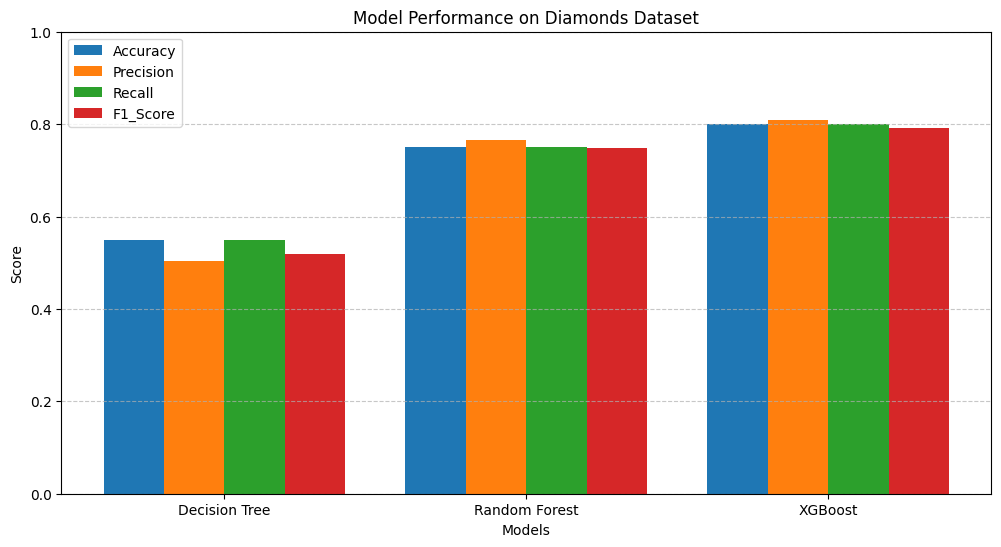

In [60]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
x = np.arange(len(models))  # Model positions
width = 0.2  # Bar width

plt.figure(figsize=(12, 6))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df[metric], width, label=metric)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance on Diamonds Dataset')
plt.xticks(x + width * 1.5, results_df['Model'])
plt.legend()
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

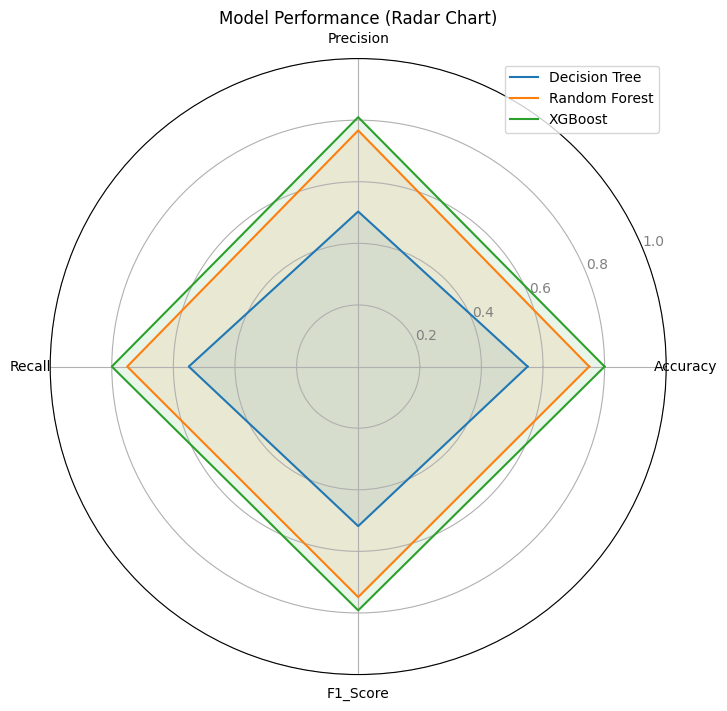

In [61]:
from math import pi

categories = metrics
N = len(categories)
angles = [n / N * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

for idx, row in results_df.iterrows():
    values = row[metrics].tolist()
    values += values[:1]
    ax.plot(angles, values, label=row['Model'])
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], color="grey")
plt.ylim(0, 1)
plt.title('Model Performance (Radar Chart)')
plt.legend(loc='upper right')
plt.show()

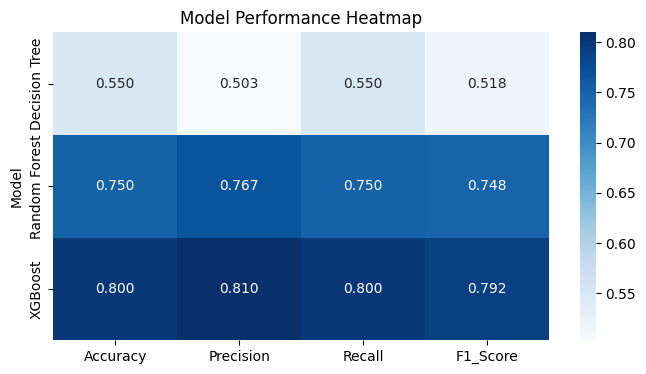

In [62]:
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index('Model'), annot=True, cmap="Blues", fmt=".3f")
plt.title('Model Performance Heatmap')
plt.show()